# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    cities.append(city)

#replace spaces with 20% to create a url correctly
city = city.replace(" ", "%20")
    
# If the city is unique, then add it to a our cities list
if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['xinqing', 'vaini', 'sale', 'brooks', 'east london', 'koslan', 'cape town', 'atuona', 'tasiilaq', 'upernavik', 'ratnagiri', 'lebu', 'grand river south east', 'kyenjojo', 'manjacaze', 'tuktoyaktuk', 'punta arenas', 'east london', 'sumbe', 'castro', 'constitucion', 'bengkulu', 'harper', 'beringovskiy', 'lufilufi', 'bermeo', 'bredasdorp', 'hithadhoo', 'mar del plata', 'avarua', 'sao felix do xingu', 'bluff', 'thompson', 'constitucion', 'palmer', 'port elizabeth', 'punta arenas', 'spassk-ryazanskiy', 'butaritari', 'isangel', 'cape town', 'atuona', 'kapaa', 'rikitea', 'rikitea', 'hilo', 'jinchang', 'bendigo', 'xining', 'sao felix do xingu', 'mar del plata', 'georgetown', 'saint george', 'port alfred', 'atar', 'ushuaia', 'jamestown', 'bijie', 'rikitea', 'abu samrah', 'port alfred', 'carnarvon', 'ushuaia', 'hasaki', 'khani', 'taolanaro', 'new norfolk', 'morondava', 'ushuaia', 'port elizabeth', 'vaini', 'najran', 'avarua', 'ballina', 'punta arenas', 'atuona', 'benguela', 'vardo', 'kavieng', '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#openWeatherMap API Key
#api_key = api_keys.api_key

#Starting URL for openWeatherMap API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [5]:
#create empty lists to append the API data into lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#start call counter for openWeatherMaps API
record = 1

#Log file print statement 
print(f"Beginning openWeatherMap API Data Retrieval")
print(f"-------------------------------------------")

counter = 0

#Loop through the cities in the city list 
for city in cities: 
    
    # Try statement to append calls where value is found and pull into list 
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one to continue loop 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(.01)
        counter += 1
        if counter == 500:
            break
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning openWeatherMap API Data Retrieval
-------------------------------------------
Processing Record 1 | Xinqing
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=xinqing
Processing Record 2 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=vaini
Processing Record 3 | Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=sale
Processing Record 4 | Brooks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=brooks
Processing Record 5 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=east london
Processing Record 6 | Koslan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=koslan
Processing Record 7 | Cape Town
http://api.openweathermap.org/data/2.5/w

Processing Record 58 | Abu Samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=abu samrah
Processing Record 59 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=port alfred
Processing Record 60 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=carnarvon
Processing Record 61 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=ushuaia
Processing Record 62 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=hasaki
Processing Record 63 | Khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=khani
City not found. Skipping...
Processing Record 64 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307b

Processing Record 115 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=bluff
Processing Record 116 | Marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=marzuq
Processing Record 117 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=ushuaia
City not found. Skipping...
Processing Record 118 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=mar del plata
Processing Record 119 | Kazanskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=kazanskaya
Processing Record 120 | Micheweni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=micheweni
Processing Record 121 | San Cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 173 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=mount isa
Processing Record 174 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=hermanus
Processing Record 175 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=atuona
Processing Record 176 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=georgetown
Processing Record 177 | Panaba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=panaba
Processing Record 178 | Skelleftea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=skelleftea
Processing Record 179 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e5

Processing Record 231 | Le Port
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=le port
Processing Record 232 | Pathalgaon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=pathalgaon
Processing Record 233 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=hermanus
Processing Record 234 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=jamestown
City not found. Skipping...
Processing Record 235 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=cape town
Processing Record 236 | Rio Cuarto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=rio cuarto
Processing Record 237 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 288 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=rikitea
Processing Record 289 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=avarua
Processing Record 290 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=rikitea
Processing Record 291 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=carnarvon
Processing Record 292 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=atuona
City not found. Skipping...
Processing Record 293 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=cape town
Processing Record 294 | Viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce56

Processing Record 345 | Ullapool
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=ullapool
Processing Record 346 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=ancud
Processing Record 347 | Waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=waipawa
City not found. Skipping...
Processing Record 348 | Bougouni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=bougouni
Processing Record 349 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=vaini
Processing Record 350 | Naantali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=naantali
Processing Record 351 | Besancon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5

Processing Record 401 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=saskylakh
Processing Record 402 | Novikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=novikovo
City not found. Skipping...
Processing Record 403 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=hermanus
Processing Record 404 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=hobart
Processing Record 405 | Itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=itoman
Processing Record 406 | Winnemucca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=winnemucca
Processing Record 407 | Nakamura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=630

City not found. Skipping...
Processing Record 459 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=punta arenas
Processing Record 460 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=ushuaia
Processing Record 461 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=thompson
City not found. Skipping...
Processing Record 462 | Zdvinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=zdvinsk
Processing Record 463 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=vila franca do campo
Processing Record 464 | Meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6307bdbce5607e5f5b368890e57cfc1d&q=meulaboh
Processing Record 465 | Dakar
http://api.openw

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Generate a dictionary from the appeneded lists
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

#Create dataframe from dictionary
weather_df = pd.DataFrame(weather_dict)

#Display total count of weather data values
weather_df.count()

City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Lat           500
Lng           500
Max Temp      500
Wind Speed    500
dtype: int64

In [7]:
#save data frame to CSV
weather_df.to_csv("outputs/weather_df.csv")

#display data frame head
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Xinqing,99,CN,1562712336,74,48.28,129.53,75.83,6.13
1,Vaini,94,IN,1562712137,88,15.34,74.49,77.45,8.68
2,Sale,57,AU,1562712064,70,-38.11,147.06,52.07,3.65
3,Brooks,65,CA,1562712336,46,50.57,-111.89,73.00,3.00
4,East London,0,ZA,1562712336,76,-33.02,27.91,52.07,3.31


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

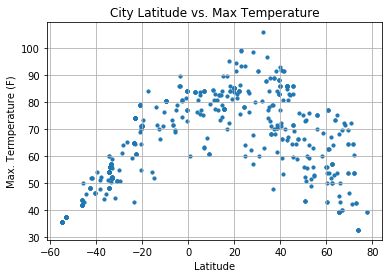

In [8]:
#create scatter plot for latitude vs. temperature plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

#add labels and titles
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Termperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save scatter plot as png
plt.savefig("outputs/max_temp_vs_latitude.png")

#display plot
plt.show()

#### Latitude vs. Humidity Plot

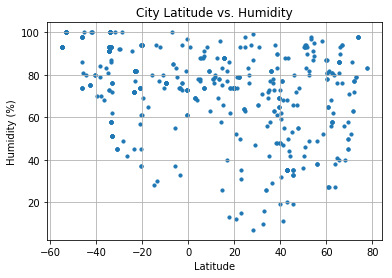

In [9]:
# create a scatter plot for city latitude vs. humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

#add labels and titles
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save scatter plot as png
plt.savefig("outputs/humidity_vs_latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

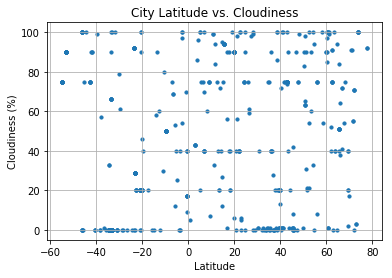

In [10]:
# create a scatter plot for latitude vs. cloudineas
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

# add labels and titles
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save scatter plot as png 
plt.savefig("outputs/cloudiness_vs_latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

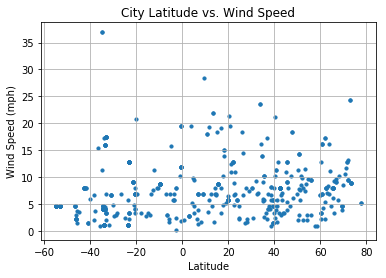

In [11]:
# create a scatter plot for latitude vs. wind speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

# add labels and titles
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save scatter plot as png
plt.savefig("outputs/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()